# Global Precipitation Measurement (GPM)

A range of GPM products are provided by the ``pansat.products.satellite.gpm`` module. Files within a given time range can be downloaded using the download function.

In [1]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
from pansat.products.satellite.gpm import l2a_gprof_gmi
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)
files = l2a_gprof_gmi.download(t_0, t_1)

The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

# GPROF GMI

In this example, we plot the surface precipitaiton as retrieved using the GPROF algorithm from observations from the GMI microwave imager on board the GPM Core Observatory.

In [2]:
import numpy as np
import numpy.ma as ma
from h5py import File

file = File(files[0])
lats = file["S1"]["Latitude"][0:2000, :]
lons = file["S1"]["Longitude"][0:2000, :]
lat_c = lats[1000, :].mean()
lon_c = lats[1000, :].mean()
lat_min, lat_max = lats.min(), lats.max()
lon_min, lon_max = lons.min(), lons.max()
pr = file["S1"]["surfacePrecipitation"][0:2000, :]
pr[pr <= 0.0] = np.nan

/home/simon/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


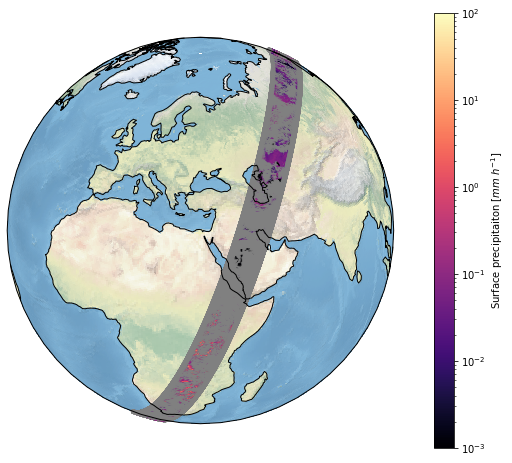

In [3]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=lat_c,
                                central_longitude=lon_c)
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
sm = ax.scatter(lons, lats, c=pr, s=10, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
ax = plt.subplot(gs[1])
plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()